In [16]:
import pandas as pd
import re
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import WordNetLemmatizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

data=pd.read_csv('train.csv', sep=',',header=0).to_numpy()
X_train = data[:,1]
y_train = data[:,2]

no_word = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself',
           'yourselves', 'he'
    , 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs'
    , 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were'
    , 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and'
    , 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against'
    , 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in'
    , 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why'
    , 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only',
           'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now', 'd',
           'll', 'm'
    , 'o', 're', 've', 'y', 'ain', 'aren', 'couldn', 'didn', 'doesn', 'hadn', 'hasn',
           'haven', 'isn', 'ma', 'mightn', 'mustn', 'needn', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn']

greek = ["alpha", "beta", "gamma", "delta", "epsilon", "zata", "eta", "theta", "iota", "kappa", "lambda", "mu", "nu",
         "xi", "omikron", "pi", "rho", "sigma", "tau", "upsilon", "phi", "chi", "psi", "omega"]

documents = []

stemmer = WordNetLemmatizer()

for sen in range(0, len(X_train)):
    # Remove all the special characters
    document = str(X_train[sen]).replace('\n', ' ')
    document = re.sub(r'\W', ' ', document)

    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)

    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)

    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)

    # Converting to Lowercase
    '''document = document.lower()
    for i in astro_words:
        if i in document:
            document = document.replace(i,(i.replace(' ','')+' '))'''
    # Lemmatization
    document = document.split()
    for i in range(len(document)):
        for m in greek:
            if m in document[i]:
                document[i] = m
    document = [stemmer.lemmatize(word) for word in document if (word.lower() not in no_word) and (not word.isdigit())]
    document = ' '.join(document)

    documents.append(document)

tfidf_Vector = TfidfVectorizer(sublinear_tf=True, min_df=3, norm='l2', encoding='latin-1', ngram_range=(1, 2), lowercase=False)
X_train = tfidf_Vector.fit_transform(documents).toarray()

unique_y = np.unique(y_train)
train_x = np.empty((0,X_train.shape[1]))
test_x = np.empty((0,X_train.shape[1]))
train_y = np.empty((0,1))
test_y = np.empty((0,1))
for i in unique_y:
    sepx = np.empty((0,X_train.shape[1]))
    sepy = np.empty((0,1))
    for j in range(X_train.shape[0]):
        if y_train[j] == i:
            sepx = np.append(sepx, np.array([X_train[j]]), axis=0)
            sepy = np.append(sepy, y_train[j])
    sep_train_x, sep_test_x, sep_train_y, sep_test_y = model_selection.train_test_split(sepx, sepy, test_size=0.2)
    train_x = np.append(train_x, sep_train_x, axis=0)
    test_x = np.append(test_x, sep_test_x, axis=0)
    train_y = np.append(train_y, sep_train_y)
    test_y = np.append(test_y, sep_test_y)

In [20]:
print("NBM")
NBM = naive_bayes.MultinomialNB(alpha=0.15)
NBM.fit(train_x, train_y)

import seaborn as sns

predict = NBM.predict(test_x)

conf_matrix = confusion_matrix(test_y, predict, xticks_rotation='vertical')
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=['ap' 'hp' 'cs' 'mc' 'cmmh' 'ht'
 's' 'po' 'apc' 'gr' 'aps' 'ma'
 'cmms' 'qp' 'apg'], 
            yticklabels=['ap' 'hp' 'cs' 'mc' 'cmmh' 'ht'
 's' 'po' 'apc' 'gr' 'aps' 'ma'
 'cmms' 'qp' 'apg'],
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

NBM


TypeError: confusion_matrix() got an unexpected keyword argument 'xticks_rotation'

In [26]:
print(np.unique(test_y))
labels = ['astro-ph' 'hep-ph' 'cs.LG' 'math.CO' 'cond-mat.mes-hall' 'hep-th'
 'stat.ML' 'physics.optics' 'astro-ph.CO' 'gr-qc' 'astro-ph.SR' 'math.AP'
 'cond-mat.mtrl-sci' 'quant-ph' 'astro-ph.GA']
categorie_codes = {
    'astro-ph': 0,
    'astro-ph.CO': 1,
    'astro-ph.GA': 2,
    'astro-ph.SR': 3,
    'cond-mat.mes-hall': 4,
    'cond-mat.mtrl-sci': 5,
    'cs.LG': 6,
    'gr-qc': 7,
    'hep-ph' : 8,
    'hep-th' : 9,
    'math.AP' : 10,
    'math.CO' : 11,
    'physics.optics' : 12,
    'quant-ph' : 13,
    'stat.ML' : 14
}
a =  confusion_matrix(test_y, predict, labels=labels)
pd.DataFrame(a, index=labels, columns=labels)

['astro-ph' 'astro-ph.CO' 'astro-ph.GA' 'astro-ph.SR' 'cond-mat.mes-hall'
 'cond-mat.mtrl-sci' 'cs.LG' 'gr-qc' 'hep-ph' 'hep-th' 'math.AP' 'math.CO'
 'physics.optics' 'quant-ph' 'stat.ML']


ValueError: At least one label specified must be in y_true

In [24]:
nbm_scores = np.array([])
alphas = np.arange(0.1, 2.01, 0.1)

for a in alphas:
    NBM = naive_bayes.MultinomialNB(alpha=a)
    NBM.fit(train_x, train_y)
    score = NBM.score(test_x, test_y)
    nbm_scores = np.append(nbm_scores, score)

plt.figure(1)
plt.plot(alphas, nbm_scores, label="Multinomial Naive Bayes")
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.legend()
plt.savefig("nbm.png")

KeyboardInterrupt: 

In [6]:
print("SVM")
SVM = svm.SVC()
SVM.fit(train_x, train_y)
print(confusion_matrix(test_y, SVM.predict(test_x)))

SVM
[[49 18 16 12  0  1  0  2  1  0  0  0  0  1  0]
 [19 51 23  1  0  0  0  2  3  0  0  0  0  1  0]
 [20 11 64  4  0  0  0  1  0  0  0  0  0  0  0]
 [14  0  8 76  0  0  2  0  0  0  0  0  0  0  0]
 [ 1  0  0  0 75 18  0  0  0  0  0  0  2  4  0]
 [ 5  0  0  0 11 80  0  0  0  0  1  0  3  0  0]
 [ 0  0  0  0  0  0 78  1  0  0  0  0  0  0 21]
 [ 4  0  0  0  0  0  1 81  0  7  0  0  1  6  0]
 [ 2  2  0  0  2  1  2  5 77  7  0  0  1  0  1]
 [ 0  0  0  0  2  1  0 12  1 79  1  0  0  4  0]
 [ 2  0  0  1  0  1  1  5  0  0 88  0  0  2  0]
 [ 4  0  0  0  0  0  0  0  0  0  0 94  1  1  0]
 [ 0  0  0  0  8  4  0  0  0  0  0  0 83  5  0]
 [ 0  0  0  0  4  0  1  4  0  5  0  2 13 71  0]
 [ 0  0  0  0  0  0 19  0  0  0  1  1  0  0 79]]


In [ ]:
C_list = np.arange(0.1, 2.01, 0.1)

svm_rbf_scores = np.array([])
for c in C_list:
    SVM = svm.SVC(C=c, kernel='rbf')
    SVM.fit(train_x, train_y)
    score = SVM.score(test_x, test_y)
    svm_rbf_scores = np.append(svm_rbf_scores, score)

plt.figure(2)
plt.plot(C_list, svm_rbf_scores, label="rbf kernel")
plt.xlabel('C')
plt.ylabel('accuracy')


svm_linear_scores = np.array([])
for c in C_list:
    SVM = svm.SVC(C=c, kernel='linear')
    SVM.fit(train_x, train_y)
    score = SVM.score(test_x, test_y)
    svm_linear_scores = np.append(svm_linear_scores, score)

plt.plot(C_list, svm_linear_scores, label="linear kernel")

svm_poly2_scores = np.array([])
for c in C_list:
    SVM = svm.SVC(C=c, kernel='poly', degree=2)
    SVM.fit(train_x, train_y)
    score = SVM.score(test_x, test_y)
    svm_poly2_scores = np.append(svm_poly2_scores, score)

plt.plot(C_list, svm_poly2_scores, label="polynomial kernel (degree 2)")

svm_poly3_scores = np.array([])
for c in C_list:
    SVM = svm.SVC(C=c, kernel='poly', degree=3)
    SVM.fit(train_x, train_y)
    score = SVM.score(test_x, test_y)
    svm_poly3_scores = np.append(svm_poly3_scores, score)

plt.plot(C_list, svm_poly3_scores, label="polynomial kernel (degree 3)")

svm_poly4_scores = np.array([])
for c in C_list:
    SVM = svm.SVC(C=c, kernel='poly', degree=4)
    SVM.fit(train_x, train_y)
    score = SVM.score(test_x, test_y)
    svm_poly4_scores = np.append(svm_poly4_scores, score)

plt.plot(C_list, svm_poly4_scores, label="polynomial kernel (degree 4)")

svm_sig_scores = np.array([])
for c in C_list:
    SVM = svm.SVC(C=c, kernel='sigmoid')
    SVM.fit(train_x, train_y)
    score = SVM.score(test_x, test_y)
    svm_sig_scores = np.append(svm_sig_scores, score)

plt.plot(C_list, svm_sig_scores, label="sigmoid kernel")
plt.legend()
plt.savefig("svm.png")

In [8]:
print("Forest")
forest_gini_scores = np.array([])
depths = np.arange(5, 31, 5)
for d in depths:
    Forest = RandomForestClassifier(max_depth=d, criterion='gini')
    Forest.fit(train_x, train_y)
    score = Forest.score(test_x, train_y)
    forest_gini_scores = np.append(forest_gini_scores, score)

plt.figure(3)
plt.plot(depths, forest_gini_scores, label="Gini impurity")
plt.xlabel('depth')
plt.ylabel('accuracy')

forest_entropy_scores = np.array([])
for d in depths:
    Forest = RandomForestClassifier(max_depth=d, criterion='entropy')
    Forest.fit(train_x, train_y)
    score = Forest.score(test_x, train_y)
    forest_entropy_scores = np.append(forest_entropy_scores, score)

plt.plot(depths, forest_entropy_scores, label="Information gain")
plt.legend()
plt.savefig("forest.png")

Forest


ValueError: Found input variables with inconsistent numbers of samples: [1600, 400]

In [ ]:
print("LR")
LR = LogisticRegression()
LR.fit(train_x, train_y)

conf_matrix = confusion_matrix(test_y, LR.predict(test_x))
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=['astro-ph' 'hep-ph' 'cs.LG' 'math.CO' 'cond-mat.mes-hall' 'hep-th'
 'stat.ML' 'physics.optics' 'astro-ph.CO' 'gr-qc' 'astro-ph.SR' 'math.AP'
 'cond-mat.mtrl-sci' 'quant-ph' 'astro-ph.GA'], 
            yticklabels=['astro-ph' 'hep-ph' 'cs.LG' 'math.CO' 'cond-mat.mes-hall' 'hep-th'
 'stat.ML' 'physics.optics' 'astro-ph.CO' 'gr-qc' 'astro-ph.SR' 'math.AP'
 'cond-mat.mtrl-sci' 'quant-ph' 'astro-ph.GA'],
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (6,) and (20,)

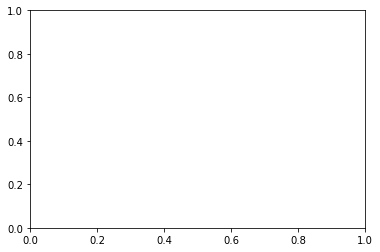

In [9]:
lr_l2_lbfgs_scores = np.array([])
C_list = np.arange(0.1, 2.01, 0.1)
for c in C_list:
    LR = LogisticRegression(C=c, penalty='l2', solver='lbfgs')
    LR.fit(train_x, train_y)
    score = LR.score(test_x, test_y)
    lr_l2_lbfgs_scores = np.append(lr_l2_lbfgs_scores, score)

plt.figure(4)
plt.plot(depths, lr_l2_lbfgs_scores, label="l2 penalty, lbfgs solver")
plt.xlabel('C')
plt.ylabel('accuracy')

lr_l2_sag_scores = np.array([])
for c in C_list:
    LR = LogisticRegression(C=c, penalty='l2', solver='sag')
    LR.fit(train_x, train_y)
    score = LR.score(test_x, test_y)
    lr_l2_sag_scores = np.append(lr_l2_sag_scores, score)

plt.plot(depths, lr_l2_sag_scores, label="l2 penalty, sag solver")

lr_l2_newton_scores = np.array([])
for c in C_list:
    LR = LogisticRegression(C=c, penalty='l2', solver='newton-cg')
    LR.fit(train_x, train_y)
    score = LR.score(test_x, test_y)
    lr_l2_newton_scores = np.append(lr_l2_newton_scores, score)

plt.plot(depths, lr_l2_newton_scores, label="l2 penalty, newton-cg solver")

lr_l2_saga_scores = np.array([])
for c in C_list:
    LR = LogisticRegression(C=c, penalty='l2', solver='saga')
    LR.fit(train_x, train_y)
    score = LR.score(test_x, test_y)
    lr_l2_saga_scores = np.append(lr_l2_saga_scores, score)

plt.plot(depths, lr_l2_saga_scores, label="l2 penalty, saga solver")
plt.legend()
plt.savefig("lr_l2.png")

lr_l1_lib_scores = np.array([])
for c in C_list:
    LR = LogisticRegression(C=c, penalty='l1', solver='liblinear')
    LR.fit(train_x, train_y)
    score = LR.score(test_x, test_y)
    lr_l1_lib_scores = np.append(lr_l1_lib_scores, score)

plt.figure(5)
plt.plot(depths, lr_l1_lib_scores, label="l1 penalty, liblinear solver")
plt.xlabel('C')
plt.ylabel('accuracy')

lr_l1_saga_scores = np.array([])
for c in C_list:
    LR = LogisticRegression(C=c, penalty='l1', solver='saga')
    LR.fit(train_x, train_y)
    score = LR.score(test_x, test_y)
    lr_l1_saga_scores = np.append(lr_l1_saga_scores, score)

plt.plot(depths, lr_l1_saga_scores, label="l1 penalty, saga solver")
plt.legend()
plt.savefig("lr_l1.png")

plt.figure(6)
plt.xlabel('C')
plt.ylabel('accuracy')
l1_ratios = np.arange(0.1, 1, 0.2)
for l in l1_ratios:
    lr_elas_scores = np.array([])
    for c in C_list:
        LR = LogisticRegression(C=c, penalty='elasticnet', solver='saga', l1_ratio=l)
        LR.fit(train_x, train_y)
        score = LR.score(test_x, test_y)
        lr_elas_scores = np.append(lr_elas_scores, score)
    lab = "l1 ratio = " + str(l)
    plt.plot(depths, lr_elas_scores, label=lab)
plt.legend()
plt.savefig("lr_elasticnet.png")

In [ ]:
"""
g1=LogisticRegression()
g1.fit(train_x, train_y)

g2=MultinomialNB(alpha=0.15)
g2.fit(train_x, train_y)

g = g1.predict_proba(train_x)+g2.predict_proba(train_x)

gf = LogisticRegression()
gf.fit(g,train_y)

g = g1.predict_proba(test_x)+g2.predict_proba(test_x)

score = gf.score(g, test_y)
print(score)
"""